In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d    

import numpy as np
import plot

plt.style.use('dark_background') 

%matplotlib inline

PATH = '../img/'
path2 = "C:/Users/yanet/Pictures/Camera Roll/WIN_20231014_16_36_37_Pro.jpg"

In [2]:
im = cv.imread(PATH+'lenna.png', cv.IMREAD_COLOR)
# im = cv.imread(path2, cv.IMREAD_COLOR)
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)
print(img.shape)
# plot.imgview(img)

(512, 512, 3)


In [3]:
def pencil_sketch_col(img):
    #inbuilt function to create sketch effect in colour and greyscale
    sk_gray, sk_color = cv.pencilSketch(img, sigma_s=60, sigma_r=0.07, shade_factor=0.1) 
    return  sk_color

In [4]:
def HDR(img):
    hdr = cv.detailEnhance(img, sigma_s=12, sigma_r=0.15)
    return  hdr

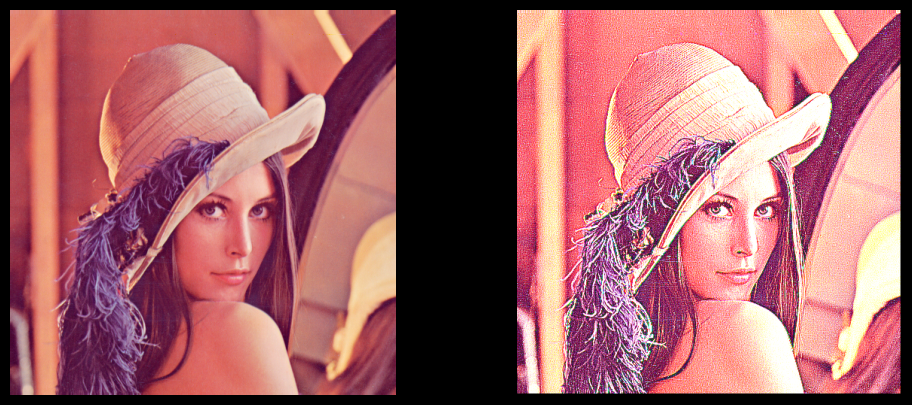

In [5]:
# imagen = img

def sharpen_img(imagen):
    kernel = np.array([[-1, -1, -1],
                    [-1, 9.5, -1],
                    [-1, -1, -1]])

    # imagen = np.pad(imagen, ((1,1), (1,1), (0, 0)), 'constant', constant_values=255)

    alto, ancho, _ = imagen.shape
    tam_kernel = kernel.shape[0]

    imagen_conv = np.zeros((alto, ancho, 3))

    for color in range(_):
        for y in range(alto - tam_kernel + 1):
            for x in range(ancho - tam_kernel + 1):
                region = imagen[y:y + tam_kernel, x:x + tam_kernel, color] * kernel
                resultado = region.sum() #region.sum(axis=(1,0))
                imagen_conv[y, x, color] = resultado
                # print(resultado)

                # region_0 = imagen[y:y + tam_kernel, x:x + tam_kernel, 0] * kernel
                # print(region_0)
                # region_1 = imagen[y:y + tam_kernel, x:x + tam_kernel, 1] * kernel
                # region_2 = imagen[y:y + tam_kernel, x:x + tam_kernel, 2] * kernel
                # print(region_1)
                # print(region_2)
                # resultado_0 = np.sum(region_0)
                # resultado_1 = np.sum(region_1)
                # resultado_2 = np.sum(region_2)
                # print(resultado_0)
                # print(resultado_1)
                # print(resultado_2)
                # break
            # imagen_conv[y, x, 0] = resultado_0
            # imagen_conv[y, x, 1] = resultado_1
            # imagen_conv[y, x, 2] = resultado_2
            # break
    # print(imagen_convolucionada)
    img_sc = cv.convertScaleAbs(imagen_conv)
    # print(img_sc)
    plot.imgcmp(imagen, img_sc)
    # imagen_convolucionada = cv.convertScaleAbs(imagen_convolucionada)
    # return imagen_convolucionada

a = sharpen_img(img)

# plot.imgview(a)


In [6]:
""" 
Universidad Francisco Marroquin
Computer Vision
Author: Christian Medina Armas
Version: 0.1
"""
import sys ; sys.path.append("../")
import plot
import cv2 as cv


# get camera handle 
device_id = 0
cap = cv.VideoCapture(device_id)

# verify that video handle is open
if (cap.isOpened() == False):
    print("Video capture failed to open")

# set video capture properties
# hardware specific

# cap.set(cv.CAP_PROP_FRAME_WIDTH, 1024);cap.set(cv.CAP_PROP_FRAME_HEIGHT, 576)
# cap.set(cv.CAP_PROP_FRAME_WIDTH, 800);cap.set(cv.CAP_PROP_FRAME_HEIGHT, 600)


# get frame, apply processing and show result
while True:
    ret, im_rgb = cap.read()
    im = im_rgb[:,:,:]
    print(im.shape)
    break

    if ret:
        # apply operation
        # blur = cv.GaussianBlur(im, (0,0), 15)
        blur = sharpen_img(im)
        # plot.imgcmp(im,blur)
        # break
        
        # create windows
        win0 = 'Original'
        win1 = 'Processed'

        r,c = im.shape[0:2]
        resize_factor = 1

        R = int(r//resize_factor)
        C = int(c//resize_factor)
        win_size = (C, R) 

        cv.namedWindow(win0, cv.WINDOW_NORMAL)
        cv.namedWindow(win1, cv.WINDOW_NORMAL)

        cv.resizeWindow(win0, (win_size[0]//2,win_size[1]//2))
        cv.resizeWindow(win1, win_size)

        cv.imshow(win0, im)
        cv.imshow(win1, blur)
	
        # align windows        
        cv.moveWindow(win1, 0, 0)
        cv.moveWindow(win0, C, 0)
        
        # exit with q
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

#clean up before exit
cap.release()
cv.destroyAllWindows()


(480, 640, 3)


In [7]:
def sharpen(img):
    kernel = np.array([[-1, -1, -1], [-1, 9.5, -1], [-1, -1, -1]])
    img_sharpen = cv.filter2D(img, -1, kernel)
    return img_sharpen

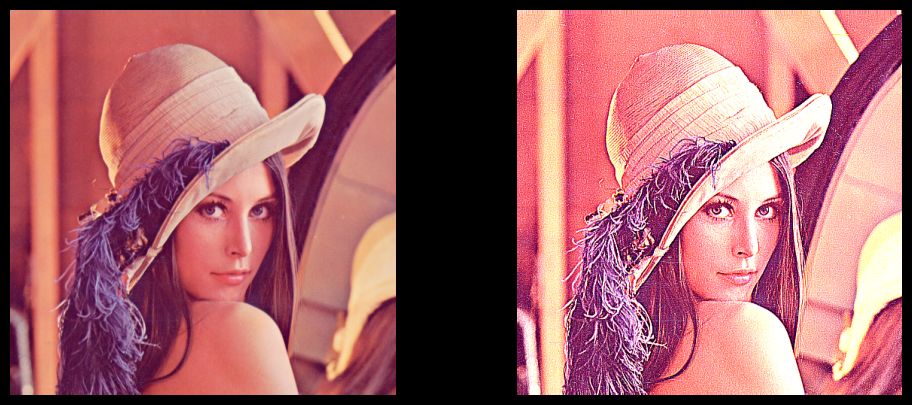

In [8]:
im_sh = sharpen(img)
plot.imgcmp(img, im_sh)